<a href="https://colab.research.google.com/github/GalBuzi/colab/blob/main/ass1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from os import listdir, makedirs
from os.path import join, exists, expanduser
from tqdm import tqdm
from sklearn.metrics import log_loss, accuracy_score
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.resnet50 import ResNet50
from keras.applications import xception
from keras.applications import inception_v3
from keras.applications.vgg16 import preprocess_input, decode_predictions
from sklearn.linear_model import LogisticRegression

from keras.models import Sequential
from keras.layers import Dense, Dropout, Lambda, Flatten
from keras.optimizers import Adam, RMSprop
from sklearn.model_selection import train_test_split
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator, load_img
import random
import cv2
from keras.models import Sequential
from keras import layers
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation,GlobalMaxPooling2D
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.applications import VGG16
from keras.models import Model
from google.colab import files
import io
from google.colab import drive

drive.mount('gdrive')


Drive already mounted at gdrive; to attempt to forcibly remount, call drive.mount("gdrive", force_remount=True).


**Question 1:**

Data Exploration:

                          breed                                id_ext
0                   boston_bull  000bec180eb18c7604dcecc8fe0dba07.jpg
1                         dingo  001513dfcb2ffafc82cccf4d8bbaba97.jpg
2                      pekinese  001cdf01b096e06d78e9e5112d419397.jpg
3                      bluetick  00214f311d5d2247d5dfe4fe24b2303d.jpg
4              golden_retriever  0021f9ceb3235effd7fcde7f7538ed62.jpg
...                         ...                                   ...
10217                    borzoi  ffd25009d635cfd16e793503ac5edef0.jpg
10218            dandie_dinmont  ffd3f636f7f379c51ba3648a9ff8254f.jpg
10219                  airedale  ffe2ca6c940cddfee68fa3cc6c63213f.jpg
10220        miniature_pinscher  ffe5f6d8e2bff356e9482a80a6e29aac.jpg
10221  chesapeake_bay_retriever  fff43b07992508bc822f33d8ffd902ae.jpg

[10222 rows x 2 columns]


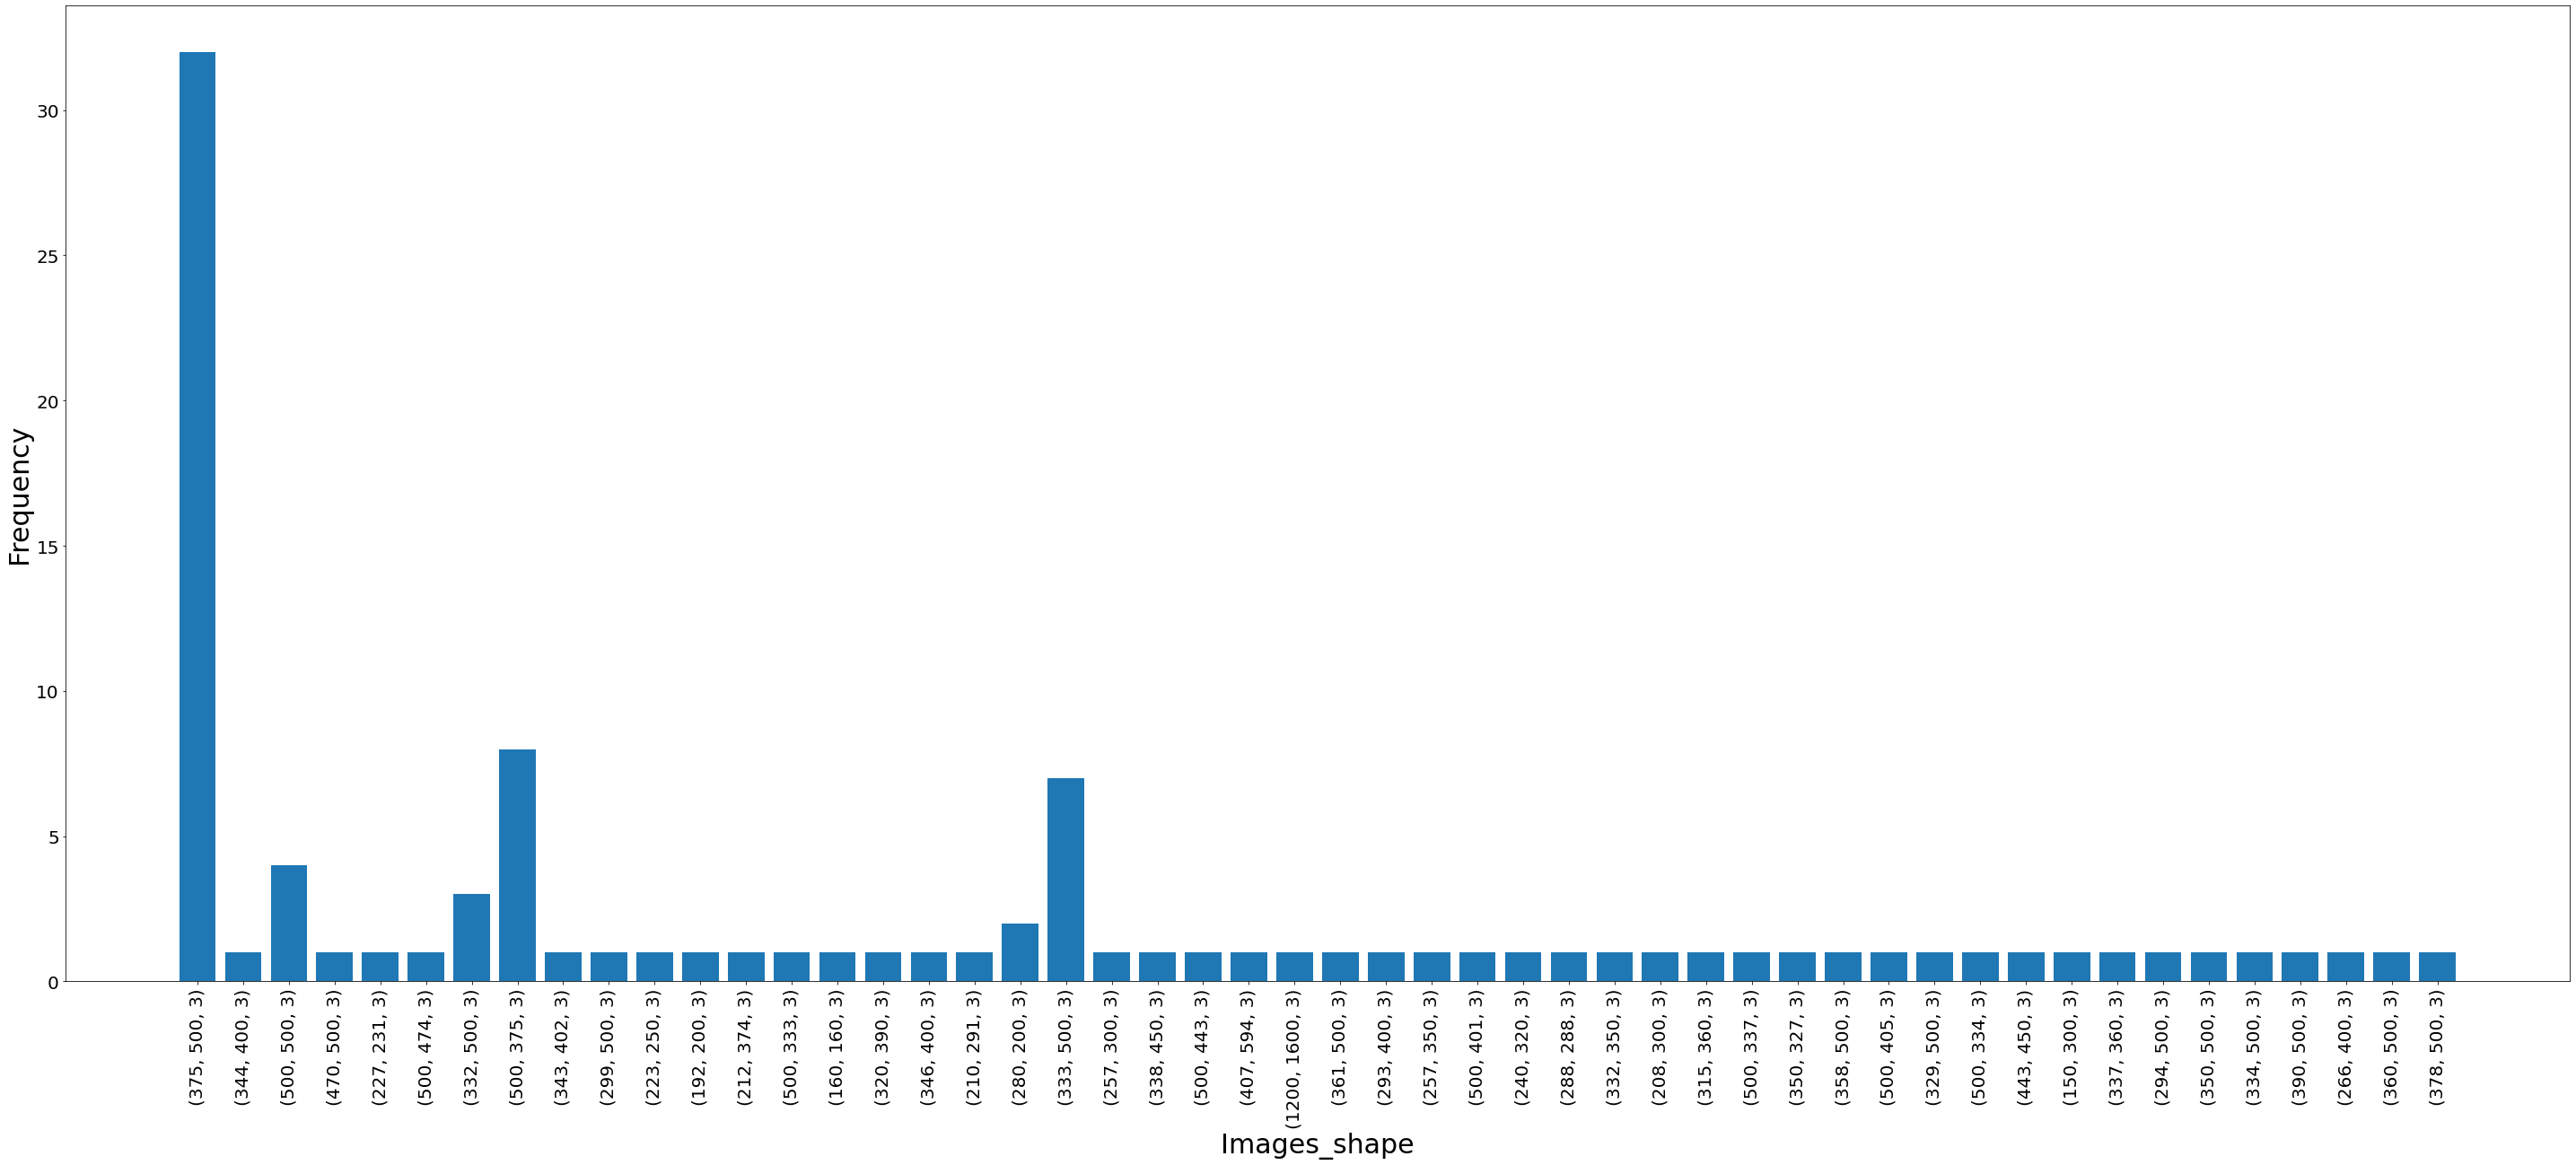

In [43]:

train_dir = 'gdrive/My Drive/dog-breed-identification/train/'
csv_file = open('gdrive/My Drive/dog-breed-identification/labels.csv')
label = pd.read_csv(csv_file)


label_df = pd.DataFrame(label['breed'].value_counts()).reset_index() # count how many labels of each breed

labels_list = list(label_df['index']) # all possible labels

label_df.columns = ['breed_name', 'count'] # change cols names

label_df.sort_values(by="count", ascending=False)

label = label[label['breed'].isin(label_df['breed_name'])]

# # adding jpg ext.

label['id_ext']=label['id'].apply(lambda x:x+'.jpg')
label=label.reset_index()
label=label.drop(['index','id'],axis=1)
images_names = list(label['id_ext'].head(100))
print(label)

# find out details about the images samples
images_dim = {}
for img in images_names:
  full_path = train_dir + img
  n = cv2.imread(full_path)
  shape_string = str(n.shape)
  if not shape_string in images_dim:
    images_dim[shape_string] = 1
  else:
    images_dim[shape_string] = images_dim[shape_string]+1

plt.figure(figsize=(50,20))
plt.bar(list(images_dim.keys()),list(images_dim.values()))
plt.xlabel("Images_shape", size=30)
plt.ylabel("Frequency", size=30)
plt.xticks(rotation=90,fontsize=20)
plt.yticks(fontsize=20)
plt.show()


a. 

*   the size of the data is: 10222 samples.

b. 

  *     the data is images of difference kinds of dogs.

  *     all images have 3 channels

  *   as we can see from the plot, all images are not of the same dimensions

  *   by first 100 images the popular dimension is (375,500)
    
  *   that means we need to pre-process our data and convert all images to same dimensions

  *   we should use augmentation to enlarge our data and decrease the overfitting

  *   because we are dealing with dogs picture, we can make augmentation like: minimal rotation, zoom in/out, horizontal flip, width/height shift range

  *   we cant use vertical flip for example because it doen't suits to the problem we are trying to solve








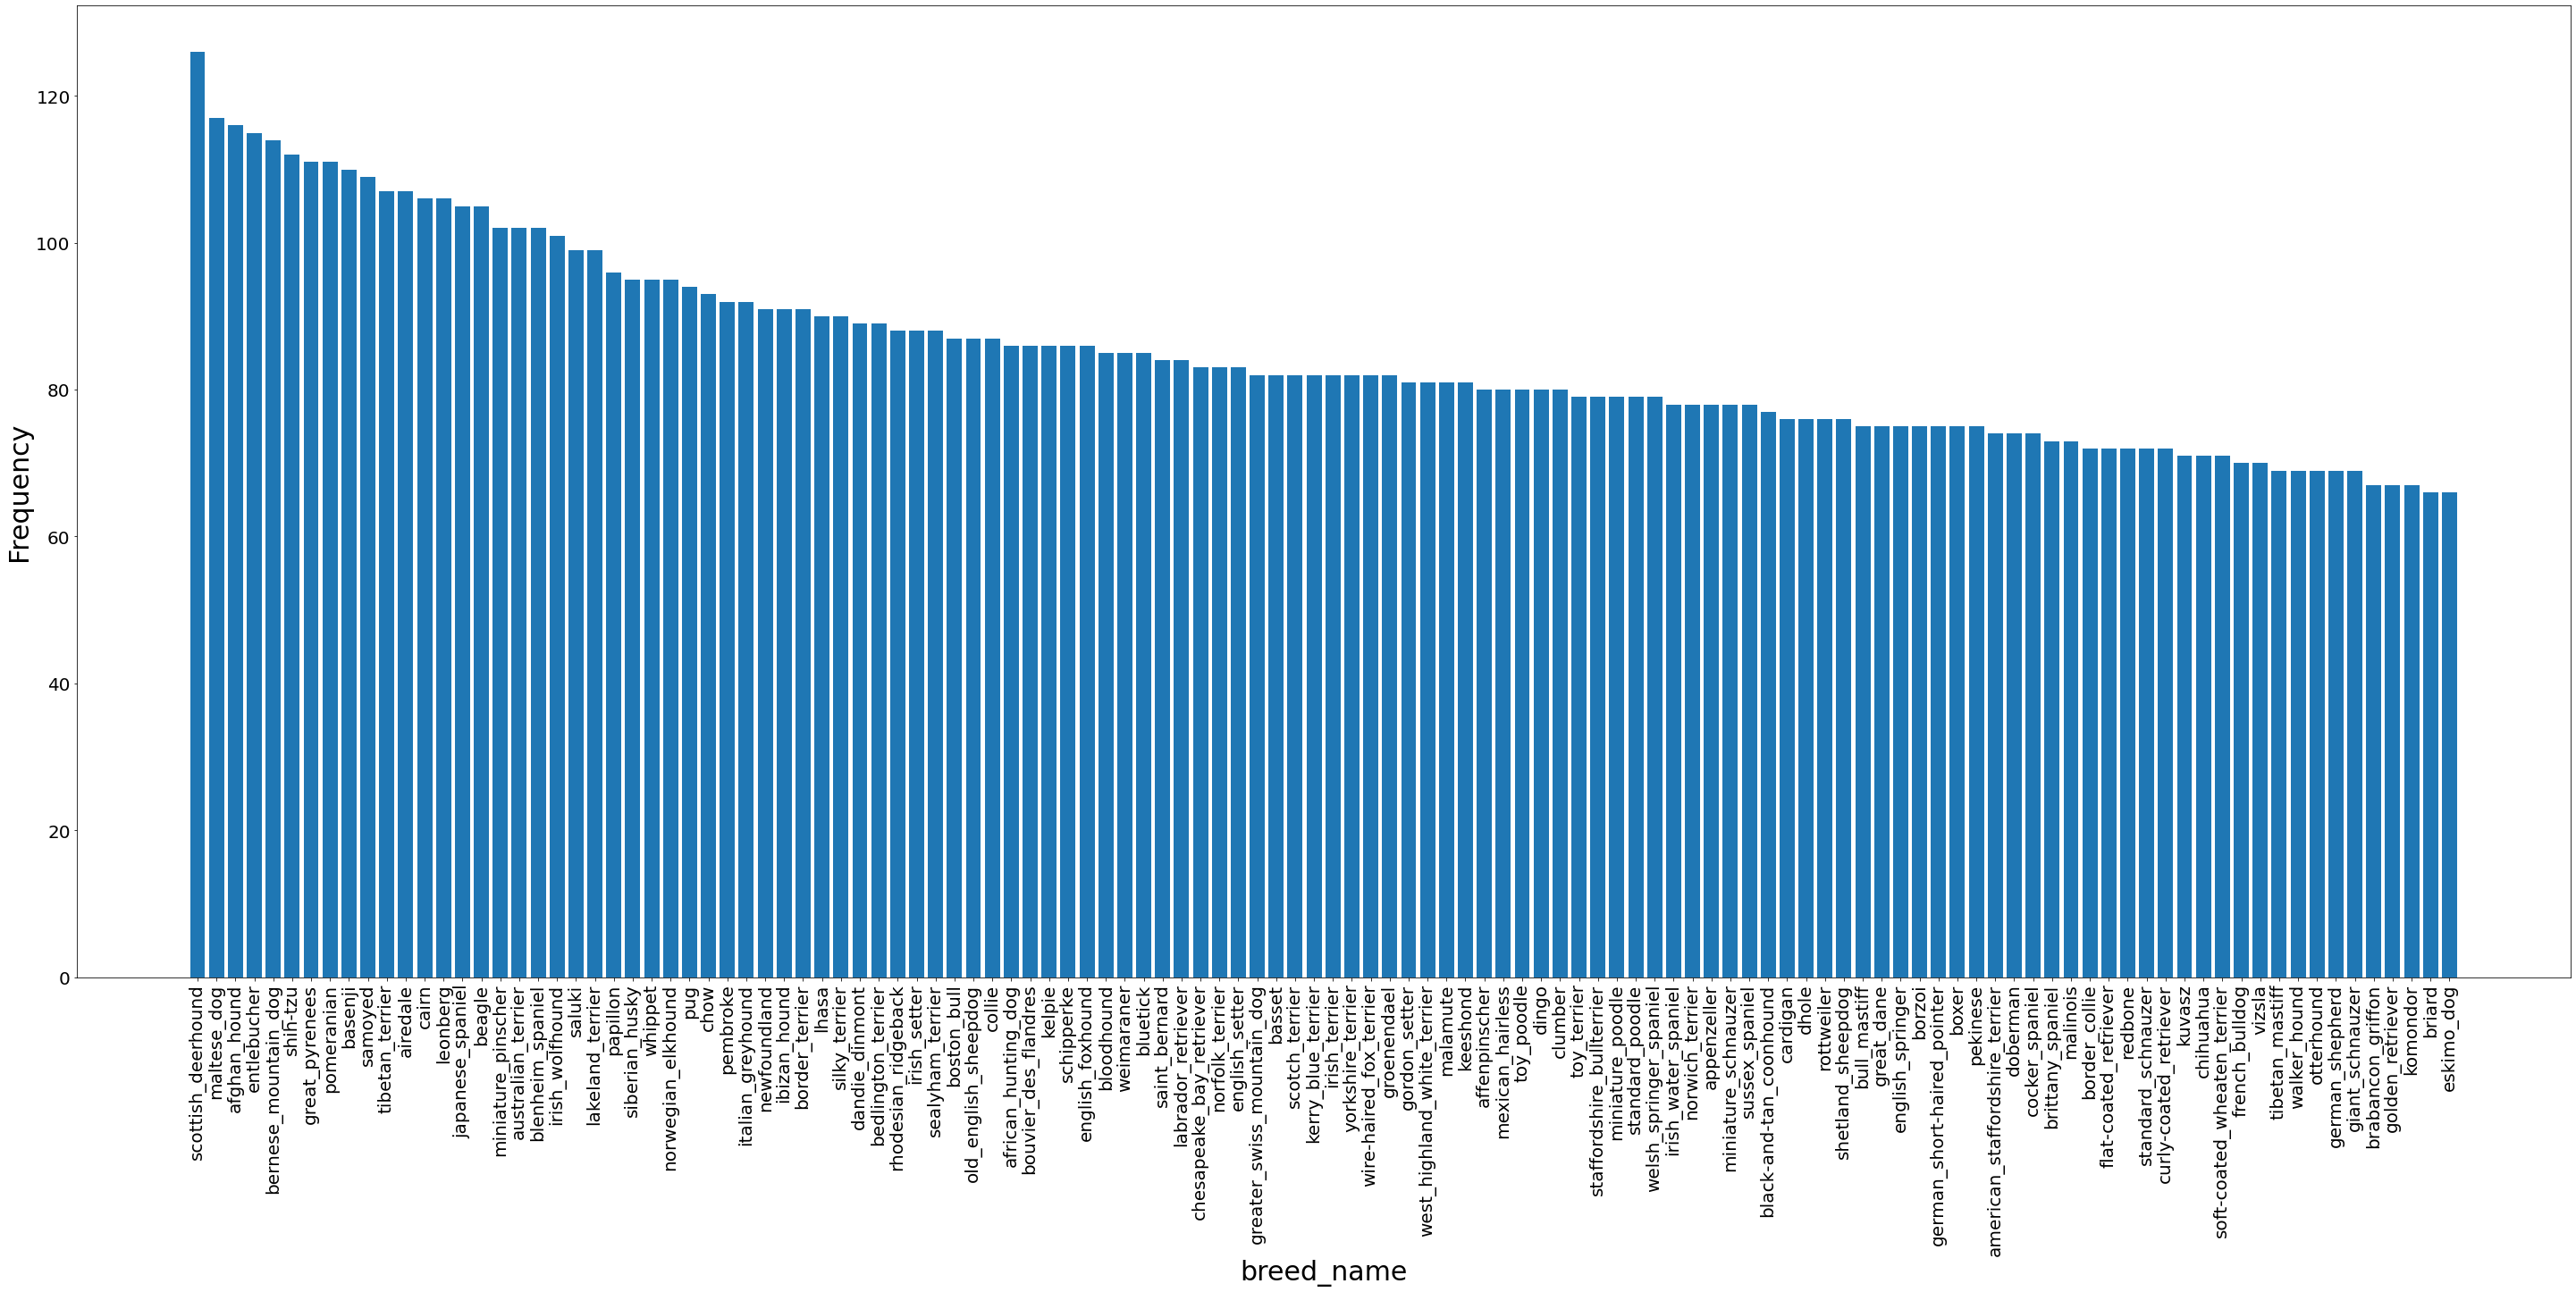

In [39]:
plt.figure(figsize=(50,20))
plt.bar(list(label_df['breed_name']),list(label_df['count']))
plt.xlabel("breed_name", size=30)
plt.ylabel("Frequency", size=30)
plt.xticks(rotation=90,fontsize=20)
plt.yticks(fontsize=20)
plt.show()

c.

  *   as we can see, the data isn't balanced, the most frequent breed appears more than 120 times and the least frequent breed appears between 60-70 times

d. benchmarks ???



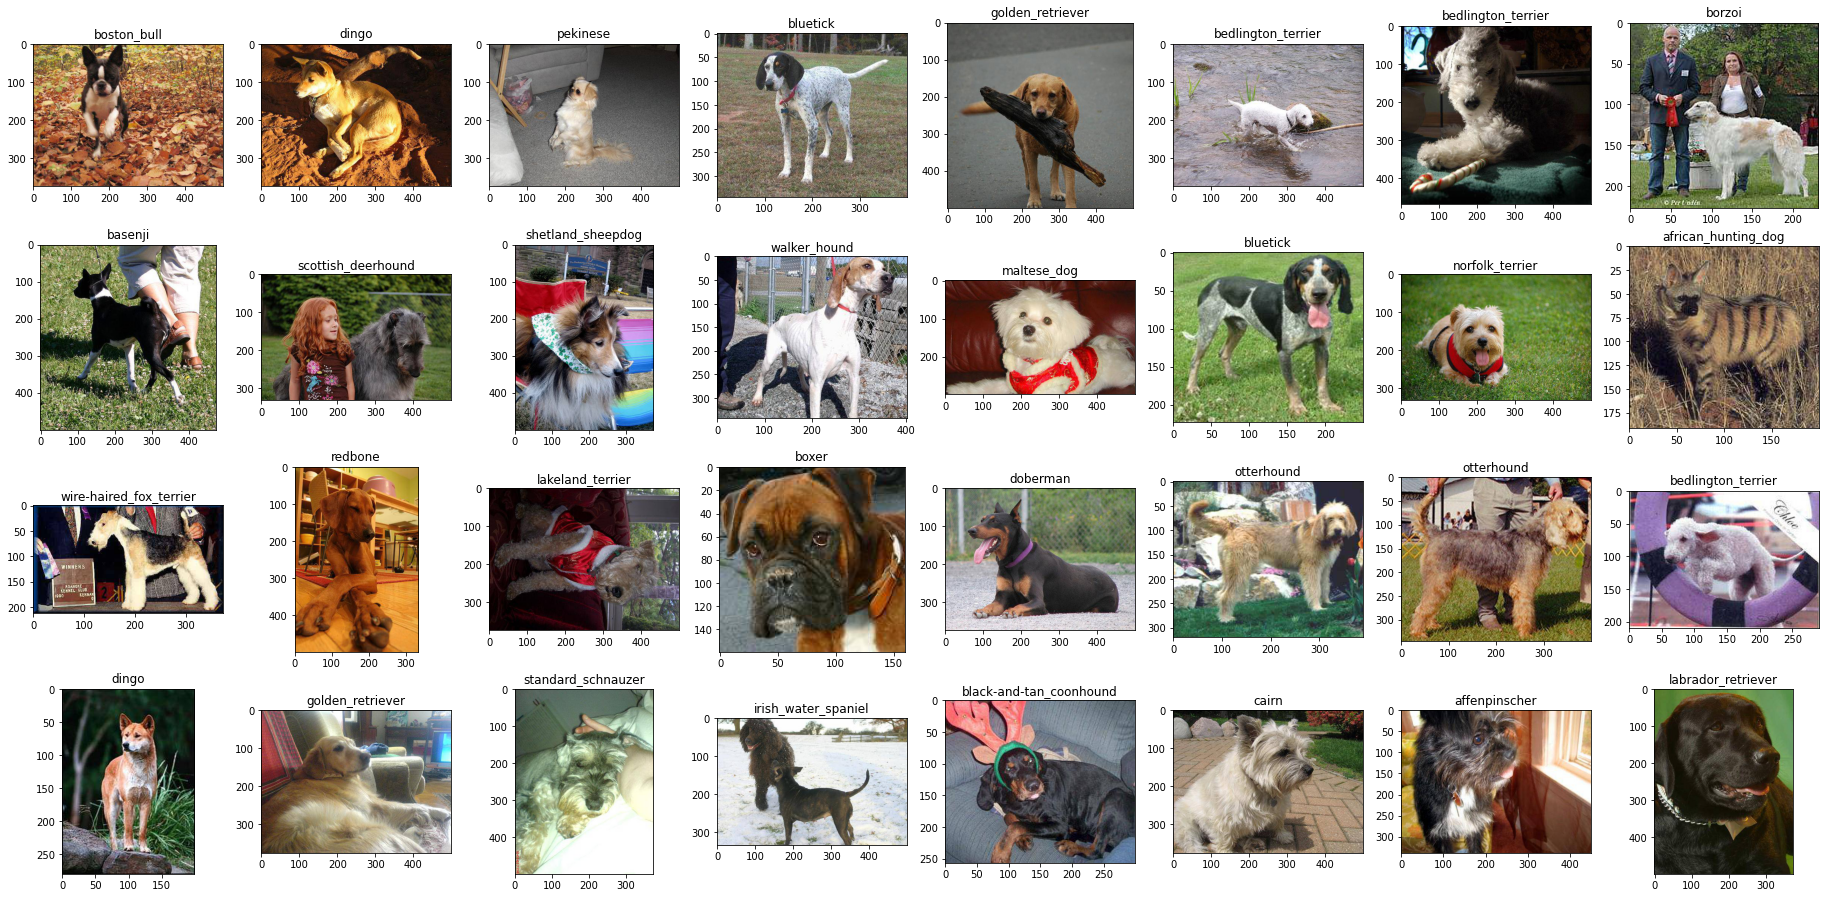

In [70]:
import matplotlib.image as mpimg

def read_and_resize_single_img(filename,nrow=224,ncol=224,channels=3):
    from scipy import misc
    arr = cv2.imread(filename)
    arr = cv2.cvtColor(arr, cv2.COLOR_RGB2BGR)
    arr = cv2.resize(arr,dsize=(nrow,ncol))
    return arr

fig = plt.figure(figsize=(32, 32))
examples = label['id_ext'].head(36)
count_pic = 0
index = 0
for e in examples:
  sub = fig.add_subplot(8,8, count_pic+1 )
  full_path = train_dir + e
  emage = mpimg.imread(full_path)
  sub.imshow(emage)
  sub.set_title(label.loc[index,'breed'])
  # sub.text(0,0, color='red', weight='bold',fontsize=15)
  count_pic = count_pic + 1
  index = index + 1
  if(count_pic==32):
        break